# Spectrum from Data Challenge

The purpose of this challenge is for you to recover the energy spectrum of a nuclear decay by fitting a Breit-Wigner distribution to observed data:

## $\mathcal{F}(E, \alpha) =\frac{1}{2}\sum_{i=1}^n  \, \frac{A_i \, \Gamma _i}{(E-E_i)^2+\Gamma_i^2}$

This model is characterized by "n" peaks, each with center $E_i$, amplitude $A_i$, and width $\Gamma_i$. We group all these parameters into $\alpha=\{A, E, \Gamma \}$

The observed data and energies are defined below. Your taks are:

- Build your likelihood and prior as a function of "n" peaks (you will later vary n). For the likelihood be careful, we are modeling this as a Poisson process and you should use that accordingly (https://en.wikipedia.org/wiki/Poisson_distribution). 
- Do Metrolopis sampling to get posterior distributions for the parameters (centers, amplitudes, and widths) for three different models with 2, 3, and 4 peaks respectively. Plot the mean predictions with associated uncertainty bands.
- How many peaks do you think the spectrum has? What are your credible intervals for the associated parameters?
- Compare your results for n=3 with a calibration done with a misspecified Gaussian likelihood (write your likelihood as $e^{-\chi^2/2}$). 
- Estimate the influence of your posterior conclusions for n=3 from unaccounted background noise of the form: $B(E,\epsilon) = \epsilon \frac{1}{1+E^2}$. To do so, corrupt your data by adding the background term at every energy. Make various plots of the posterior distributions for different values of the background strenght $\epsilon$.




For an interesting paper related to this discussion that uses a cool technique (deblurring) check: https://arxiv.org/abs/2210.00157

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def background(E,eps):
    return eps/(1+E**2)

In [3]:
Energies=np.array([ 0.        ,  0.03344482,  0.06688963,  0.10033445,  0.13377926,
        0.16722408,  0.2006689 ,  0.23411371,  0.26755853,  0.30100334,
        0.33444816,  0.36789298,  0.40133779,  0.43478261,  0.46822742,
        0.50167224,  0.53511706,  0.56856187,  0.60200669,  0.63545151,
        0.66889632,  0.70234114,  0.73578595,  0.76923077,  0.80267559,
        0.8361204 ,  0.86956522,  0.90301003,  0.93645485,  0.96989967,
        1.00334448,  1.0367893 ,  1.07023411,  1.10367893,  1.13712375,
        1.17056856,  1.20401338,  1.23745819,  1.27090301,  1.30434783,
        1.33779264,  1.37123746,  1.40468227,  1.43812709,  1.47157191,
        1.50501672,  1.53846154,  1.57190635,  1.60535117,  1.63879599,
        1.6722408 ,  1.70568562,  1.73913043,  1.77257525,  1.80602007,
        1.83946488,  1.8729097 ,  1.90635452,  1.93979933,  1.97324415,
        2.00668896,  2.04013378,  2.0735786 ,  2.10702341,  2.14046823,
        2.17391304,  2.20735786,  2.24080268,  2.27424749,  2.30769231,
        2.34113712,  2.37458194,  2.40802676,  2.44147157,  2.47491639,
        2.5083612 ,  2.54180602,  2.57525084,  2.60869565,  2.64214047,
        2.67558528,  2.7090301 ,  2.74247492,  2.77591973,  2.80936455,
        2.84280936,  2.87625418,  2.909699  ,  2.94314381,  2.97658863,
        3.01003344,  3.04347826,  3.07692308,  3.11036789,  3.14381271,
        3.17725753,  3.21070234,  3.24414716,  3.27759197,  3.31103679,
        3.34448161,  3.37792642,  3.41137124,  3.44481605,  3.47826087,
        3.51170569,  3.5451505 ,  3.57859532,  3.61204013,  3.64548495,
        3.67892977,  3.71237458,  3.7458194 ,  3.77926421,  3.81270903,
        3.84615385,  3.87959866,  3.91304348,  3.94648829,  3.97993311,
        4.01337793,  4.04682274,  4.08026756,  4.11371237,  4.14715719,
        4.18060201,  4.21404682,  4.24749164,  4.28093645,  4.31438127,
        4.34782609,  4.3812709 ,  4.41471572,  4.44816054,  4.48160535,
        4.51505017,  4.54849498,  4.5819398 ,  4.61538462,  4.64882943,
        4.68227425,  4.71571906,  4.74916388,  4.7826087 ,  4.81605351,
        4.84949833,  4.88294314,  4.91638796,  4.94983278,  4.98327759,
        5.01672241,  5.05016722,  5.08361204,  5.11705686,  5.15050167,
        5.18394649,  5.2173913 ,  5.25083612,  5.28428094,  5.31772575,
        5.35117057,  5.38461538,  5.4180602 ,  5.45150502,  5.48494983,
        5.51839465,  5.55183946,  5.58528428,  5.6187291 ,  5.65217391,
        5.68561873,  5.71906355,  5.75250836,  5.78595318,  5.81939799,
        5.85284281,  5.88628763,  5.91973244,  5.95317726,  5.98662207,
        6.02006689,  6.05351171,  6.08695652,  6.12040134,  6.15384615,
        6.18729097,  6.22073579,  6.2541806 ,  6.28762542,  6.32107023,
        6.35451505,  6.38795987,  6.42140468,  6.4548495 ,  6.48829431,
        6.52173913,  6.55518395,  6.58862876,  6.62207358,  6.65551839,
        6.68896321,  6.72240803,  6.75585284,  6.78929766,  6.82274247,
        6.85618729,  6.88963211,  6.92307692,  6.95652174,  6.98996656,
        7.02341137,  7.05685619,  7.090301  ,  7.12374582,  7.15719064,
        7.19063545,  7.22408027,  7.25752508,  7.2909699 ,  7.32441472,
        7.35785953,  7.39130435,  7.42474916,  7.45819398,  7.4916388 ,
        7.52508361,  7.55852843,  7.59197324,  7.62541806,  7.65886288,
        7.69230769,  7.72575251,  7.75919732,  7.79264214,  7.82608696,
        7.85953177,  7.89297659,  7.9264214 ,  7.95986622,  7.99331104,
        8.02675585,  8.06020067,  8.09364548,  8.1270903 ,  8.16053512,
        8.19397993,  8.22742475,  8.26086957,  8.29431438,  8.3277592 ,
        8.36120401,  8.39464883,  8.42809365,  8.46153846,  8.49498328,
        8.52842809,  8.56187291,  8.59531773,  8.62876254,  8.66220736,
        8.69565217,  8.72909699,  8.76254181,  8.79598662,  8.82943144,
        8.86287625,  8.89632107,  8.92976589,  8.9632107 ,  8.99665552,
        9.03010033,  9.06354515,  9.09698997,  9.13043478,  9.1638796 ,
        9.19732441,  9.23076923,  9.26421405,  9.29765886,  9.33110368,
        9.36454849,  9.39799331,  9.43143813,  9.46488294,  9.49832776,
        9.53177258,  9.56521739,  9.59866221,  9.63210702,  9.66555184,
        9.69899666,  9.73244147,  9.76588629,  9.7993311 ,  9.83277592,
        9.86622074,  9.89966555,  9.93311037,  9.96655518, 10.        ])

In [4]:
counts=np.array([58, 67, 54, 53, 72, 59, 74, 66, 73, 60, 45, 45, 43, 43, 41, 39, 43,
       36, 39, 32, 32, 27, 40, 26, 26, 32, 36, 31, 29, 33, 27, 29, 28, 26,
       28, 33, 33, 32, 32, 26, 44, 36, 38, 32, 30, 37, 30, 37, 37, 37, 28,
       33, 31, 26, 24, 28, 23, 25, 23, 31, 25, 22, 22, 17, 20, 24, 19, 27,
       20, 17, 16, 11, 14, 19, 19, 12, 12, 12,  9, 19, 16, 14, 15, 12, 10,
       15, 13, 21,  9, 22, 19, 17, 11, 15, 12, 12, 10, 16, 14, 17, 16, 21,
       23, 14, 17, 16, 16, 15, 14, 12, 19, 18, 17, 20, 22, 13, 19, 15, 13,
       23, 21, 12,  5, 24, 16, 19, 16, 22, 17, 13, 22, 15, 14, 21, 26, 18,
       24, 19, 21, 24, 18, 20, 12, 17, 14, 26, 18, 11, 25, 24, 29, 22, 15,
       15, 24, 14, 18, 15, 18, 16, 19, 17, 19, 23, 10, 11, 19, 15, 12, 18,
       16, 20, 20, 20, 12, 17, 21, 28,  7, 15, 13, 15, 14, 10,  8,  6,  8,
        9, 10, 11, 12, 11,  6, 13, 14, 12, 12,  7, 15,  9, 12,  8, 10, 13,
        2,  8, 12,  6, 10,  9, 13, 10,  3, 12, 11, 14,  8, 10,  6,  4,  9,
        6,  4,  5,  6,  6, 11,  7,  4, 13,  9,  6,  7,  5,  6,  6,  6,  6,
        4, 10,  3,  7,  7,  2,  6,  6,  4,  3,  5,  7,  5,  4,  7,  4,  5,
        4,  5,  3,  3,  5,  4,  3,  3,  3,  1,  4,  4,  2,  4,  4,  4,  4,
        5,  2,  3,  4,  3,  5,  3,  4,  2,  5,  4,  4,  3,  2,  3,  2,  3,
        4,  2,  3,  4,  2,  2,  1,  3,  1,  6,  3])

In [5]:
# Define the E range and number of data points
E_min = 0
E_max = 10

# Generate E values
EnGrid = np.linspace(E_min, E_max, 1000)


The following is the Breit-Wigner Spectrum function for a given set of parameters. 
It will create as many peaks as there are "centers" in the list.

In [6]:
def Spectrum(xval,parameters):
    
    centers,amplitudes,widths=parameters
    
    value=0
    for i in range(len(centers)):
        value=value+ 1/2*amplitudes[i] * widths[i] / ((xval - centers[i]) ** 2 + widths[i] ** 2)
    return value

In [7]:
# Define example parameters for each Breit-Wigner distribution. I picked this almost at random.

params_example=[[1, 2, 4], 1/3*np.array([150, 90, 100]), [0.5, 0.2, 3]]

In [8]:
y_example=Spectrum(EnGrid,params_example)

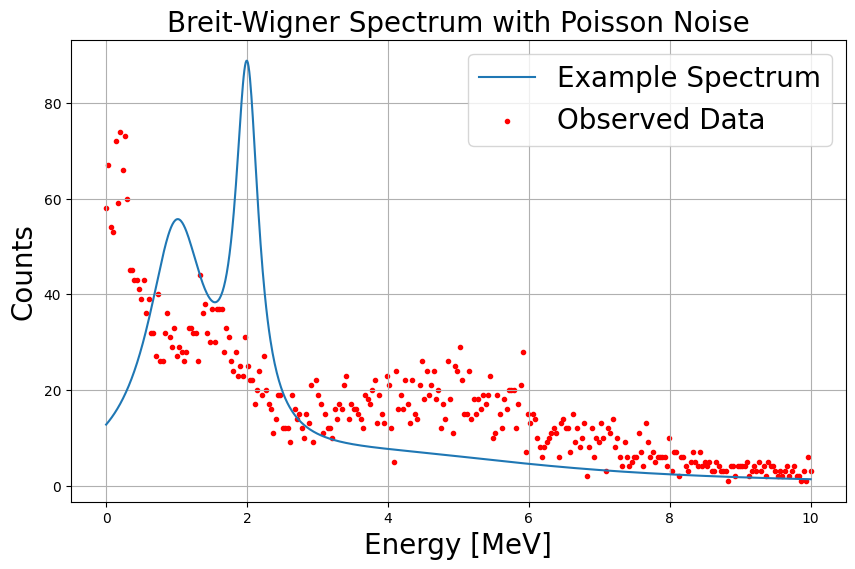

In [9]:

# Plot the true y values and the noisy data
plt.figure(figsize=(10, 6))
plt.plot(EnGrid, y_example, label='Example Spectrum')


plt.scatter(Energies, counts, marker='.', color='red', label='Observed Data')

plt.xlabel('Energy [MeV]',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.title('Breit-Wigner Spectrum with Poisson Noise',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)

plt.show()


As we can see, these values of the parameters do not reproduce the data very well. Guess we will have to use Bayesian methods to find better values!

In [ ]:
#p(alpha|data) \propto p(data|alpha) p(alpha)
#take likelihood as product of Poisson distribution for each data point
def poisson_distribution(k,lamb):
    return lamb**k * np.exp(-lamb)/math.factorial(k)

def likelihood(k,eneg,alpha):
    return poisson_distribution(k,Spectrum(eneg,alpha))

def prior(alpha):
    return np.random.normal(size=alpha.shape)
